In [1]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython as ip
import sklearn as skl

data = pd.read_csv('diamonds_data.csv')

data.info()

data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 27 columns):
Unnamed: 0        53940 non-null int64
carat             53940 non-null float64
cut_Fair          53940 non-null int64
cut_Good          53940 non-null int64
cut_Ideal         53940 non-null int64
cut_Premium       53940 non-null int64
cut_Very Good     53940 non-null int64
color_D           53940 non-null int64
color_E           53940 non-null int64
color_F           53940 non-null int64
color_G           53940 non-null int64
color_H           53940 non-null int64
color_I           53940 non-null int64
color_J           53940 non-null int64
clarity_I1        53940 non-null int64
clarity_IF        53940 non-null int64
clarity_SI1       53940 non-null int64
clarity_SI2       53940 non-null int64
clarity_VS1       53940 non-null int64
clarity_VS2       53940 non-null int64
clarity_VVS1      53940 non-null int64
clarity_VVS2      53940 non-null int64
cut               53940 non-nul

,Unnamed: 0,carat,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,...,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,cut,color,clarity,priceperpoint,carat_discrete
0,0,0.23,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,2,7,1,1
1,1,0.21,0,0,0,1,0,0,1,0,...,0,0,0,0,0,2,2,6,1,1
2,2,0.23,0,1,0,0,0,0,1,0,...,0,1,0,0,0,4,2,4,1,1


In [2]:
# Removing IDs
data=data.drop([data.columns[0]], axis=1)

data.head(3)

,carat,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,...,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,cut,color,clarity,priceperpoint,carat_discrete
0,0.23,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,1,2,7,1,1
1,0.21,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,2,2,6,1,1
2,0.23,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,4,2,4,1,1


In [3]:
# Splittting
# Cutting data set into training and testing data
from sklearn.model_selection import train_test_split
sampled_data=pd.concat([data[data['priceperpoint']==4].sample(7000),data[data['priceperpoint']==3].sample(7000),data[data['priceperpoint']==2].sample(7000),data[data['priceperpoint']==1].sample(7000)],ignore_index=True)

print(sampled_data['priceperpoint'].value_counts())
X=sampled_data.drop(['priceperpoint'], axis=1)
y=sampled_data['priceperpoint']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.15, random_state=0, stratify=None)
print("training \n", y_train.value_counts())
print("testing \n", y_test.value_counts())

4    7000
3    7000
2    7000
1    7000
Name: priceperpoint, dtype: int64
training 
 1    5968
2    5953
4    5947
3    5932
Name: priceperpoint, dtype: int64
testing 
 3    1068
4    1053
2    1047
1    1032
Name: priceperpoint, dtype: int64


In [4]:
# Evaluation Modules
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import zero_one_loss

# DecisionTree

In [37]:
from sklearn.tree import DecisionTreeClassifier

CN = 'entropy'
RandState = 6

In [38]:
# All features

DT_all = DecisionTreeClassifier(criterion=CN, random_state=RandState)
DT_all.fit(X_train, y_train)
print('Training score: ', DT_all.score(X_train, y_train))
print('Testing score: ', DT_all.score(X_test, y_test))

y_pred_DT_all = DT_all.predict(X_test)
print('f1 score[macro]= ', f1_score(y_test, y_pred_DT_all, average='macro'))

print('Confusion Metrics:')
DT_CM_all = confusion_matrix(y_test, y_pred_DT_all)
pd.crosstab(y_test, y_pred_DT_all, rownames=['true'], colnames=['predicted'], margins=True)

Training score:  0.9223529411764706
Testing score:  0.8507142857142858
f1 score[micro]=  0.8507142857142858
Confusion Metrics:


predicted,1,2,3,4,All
true,,,,,
1,966,66,0,0,1032
2,157,799,91,0,1047
3,1,96,874,97,1068
4,0,0,119,934,1053
All,1124,961,1084,1031,4200


In [39]:
# Original features
predictors = ['carat', 'cut', 'color', 'clarity']

DT_ori = DecisionTreeClassifier(criterion=CN, random_state=RandState)
DT_ori.fit(X_train[predictors], y_train)
print('Training score: ', DT_ori.score(X_train[predictors], y_train))
print('Testing score: ', DT_ori.score(X_test[predictors], y_test))

y_pred_DT_ori = DT_ori.predict(X_test[predictors])
print('f1 score[macro]= ', f1_score(y_test, y_pred_DT_ori, average='macro'))

print('Confusion Metrics:')
DT_CM_ori = confusion_matrix(y_test, y_pred_DT_ori)
pd.crosstab(y_test, y_pred_DT_ori, rownames=['true'], colnames=['predicted'], margins=True)

Training score:  0.9223529411764706
Testing score:  0.8488095238095238
f1 score[micro]=  0.8488095238095238
Confusion Metrics:


predicted,1,2,3,4,All
true,,,,,
1,965,67,0,0,1032
2,162,790,95,0,1047
3,1,95,871,101,1068
4,0,0,114,939,1053
All,1128,952,1080,1040,4200


In [40]:
# Categorized
predictors = ['carat_discrete', 'cut', 'color', 'clarity']

DT_cat = DecisionTreeClassifier(criterion=CN, random_state=RandState)
DT_cat.fit(X_train[predictors], y_train)
print('Training score: ', DT_cat.score(X_train[predictors], y_train))
print('Testing score: ', DT_cat.score(X_test[predictors], y_test))

y_pred_DT_cat = DT_cat.predict(X_test[predictors])
print('f1 score[macro]= ', f1_score(y_test, y_pred_DT_cat, average='macro'))

print('Confusion Metrics:')
DT_CM_cat = confusion_matrix(y_test, y_pred_DT_cat)
pd.crosstab(y_test, y_pred_DT_cat, rownames=['true'], colnames=['predicted'], margins=True)

Training score:  0.7384033613445378
Testing score:  0.7292857142857143
f1 score[micro]=  0.7292857142857143
Confusion Metrics:


predicted,1,2,3,4,All
true,,,,,
1,930,102,0,0,1032
2,170,745,123,9,1047
3,4,196,687,181,1068
4,0,7,345,701,1053
All,1104,1050,1155,891,4200


In [177]:
# Continuous+Binarized
predictors = ['carat', 'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']

DT_CB = DecisionTreeClassifier(criterion=CN, random_state=RandState)
DT_CB.fit (X_train[predictors], y_train)
print('Training score: ', DT_CB.score(X_train[predictors], y_train))
print('Testing score: ', DT_CB.score(X_test[predictors], y_test))

y_pred_DT_CB = DT_CB.predict(X_test[predictors])
print('f1 score[macro]= ', f1_score(y_test, y_pred_DT_CB, average='macro'))

print('Confusion Metrics:')
DT_CM_CB = confusion_matrix(y_test, y_pred_DT_CB)
pd.crosstab(y_test, y_pred_DT_CB, rownames=['true'], colnames=['predicted'], margins=True)

Training score:  0.9223529411764706
Testing score:  0.8502380952380952
f1 score[macro]=  0.8496105228406012
Confusion Metrics:


predicted,1,2,3,4,All
true,,,,,
1,965,65,1,1,1032
2,156,800,91,0,1047
3,1,96,869,102,1068
4,0,0,116,937,1053
All,1122,961,1077,1040,4200


Confusion matrix, without normalization
[[965  65   1   1]
 [156 800  91   0]
 [  1  96 869 102]
 [  0   0 116 937]]
Normalized confusion matrix
[[0.93507752 0.0629845  0.00096899 0.00096899]
 [0.14899713 0.76408787 0.086915   0.        ]
 [0.00093633 0.08988764 0.81367041 0.09550562]
 [0.         0.         0.11016144 0.88983856]]


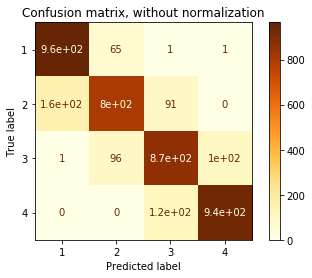

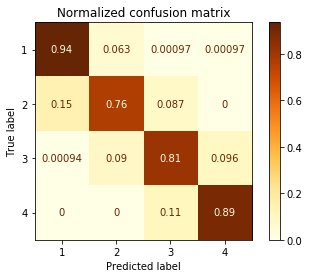

Classificaion Report: 
              precision    recall  f1-score   support

           1       0.86      0.94      0.90      1032
           2       0.83      0.76      0.80      1047
           3       0.81      0.81      0.81      1068
           4       0.90      0.89      0.90      1053

    accuracy                           0.85      4200
   macro avg       0.85      0.85      0.85      4200
weighted avg       0.85      0.85      0.85      4200



In [180]:
titles_options = [('Confusion matrix, without normalization', None),('Normalized confusion matrix', 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(DT_CB, X_test[predictors], y_test,
                                 display_labels=[1, 2, 3, 4],
                                 cmap=plt.cm.YlOrBr,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

print('Classificaion Report: ')
print(classification_report(y_test, y_pred_DT_CB))

In [42]:
# Discretized+Binarized
predictors = ['carat_discrete', 'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']

DT_DB = DecisionTreeClassifier(criterion=CN, random_state=RandState)
DT_DB.fit(X_train[predictors], y_train)
print('Training score: ', DT_DB.score(X_train[predictors], y_train))
print('Testing score: ', DT_DB.score(X_test[predictors], y_test))

y_pred_DT_DB = DT_DB.predict(X_test[predictors])
print('f1 score[macro]= ', f1_score(y_test, y_pred_DT_DB, average='macro'))

print('Confusion Metrics:')
DT_CM_DB = confusion_matrix(y_test, y_pred_DT_DB)
pd.crosstab(y_test, y_pred_DT_DB, rownames=['true'], colnames=['predicted'], margins=True)

Training score:  0.7384033613445378
Testing score:  0.7292857142857143
f1 score[micro]=  0.7292857142857143
Confusion Metrics:


predicted,1,2,3,4,All
true,,,,,
1,930,102,0,0,1032
2,170,745,123,9,1047
3,4,196,688,180,1068
4,0,7,346,700,1053
All,1104,1050,1157,889,4200


# AdaBoost

In [63]:
from sklearn.ensemble import AdaBoostClassifier

AdaNEst = 400
LearnR = 0.9627
RandState = 6

dt = DecisionTreeClassifier(max_depth=100, min_samples_leaf=1)
dt.fit(X_train, y_train)
dt_err = 1.0 - dt.score(X_test, y_test)

In [65]:
# All features
Ada_all = AdaBoostClassifier(base_estimator=dt, learning_rate=LearnR,
                             n_estimators=200, random_state=RandState, algorithm='SAMME')
Ada_all.fit(X_train, y_train)
print('Training accuracy: ', Ada_all.score(X_train, y_train))
print('Testing accuracy: ', Ada_all.score(X_test, y_test))


AdaReal_all = AdaBoostClassifier(base_estimator=dt, learning_rate=LearnR,
                                  n_estimators=200, random_state=RandState, algorithm='SAMME.R')
AdaReal_all.fit(X_train, y_train)
print('Training accuracy(real): ', AdaReal_all.score(X_train, y_train))
print('Testing accuracy(real): ', AdaReal_all.score(X_test, y_test))

y_pred_Ada_all = Ada_all.predict(X_test)
print('f1 score[macro]= ', f1_score(y_test, y_pred_Ada_all, average='macro'))

y_pred_AdaReal_all = AdaReal_all.predict(X_test)
print('f1 score[macro](real)= ', f1_score(y_test, y_pred_AdaReal_all, average='macro'))


print('Confusion Metrics:')
Ada_all_CM = confusion_matrix(y_test, y_pred_Ada_all)
pd.crosstab(y_test, y_pred_Ada_all, rownames=['true'], colnames=['predicted'], margins=True)

Training accuracy:  0.9223529411764706
Testing accuracy:  0.855
Training accuracy(real):  0.8832773109243698
Testing accuracy(real):  0.8233333333333334
f1 score[macro]=  0.8543433200756939
f1 score[macro](real)=  0.8236180735331374
Confusion Metrics:


predicted,1,2,3,4,All
true,,,,,
1,966,66,0,0,1032
2,149,807,91,0,1047
3,1,95,870,102,1068
4,0,0,105,948,1053
All,1116,968,1066,1050,4200


In [66]:
print('Confusion Metrics(real):')
AdaReal_all_CM = confusion_matrix(y_test, y_pred_AdaReal_all)
pd.crosstab(y_test, y_pred_AdaReal_all, rownames=['true'], colnames=['predicted'], margins=True)

Confusion Metrics(real):


predicted,1,2,3,4,All
true,,,,,
1,896,136,0,0,1032
2,151,804,92,0,1047
3,1,127,828,112,1068
4,0,0,123,930,1053
All,1048,1067,1043,1042,4200


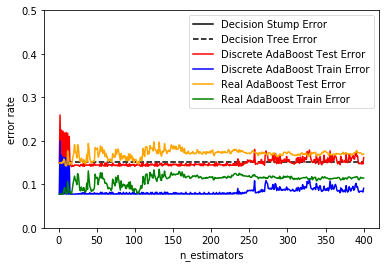

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot([1, AdaNEst], [dt_stump_err] * 2, 'k-',
        label='Decision Stump Error')
ax.plot([1, AdaNEst], [dt_err] * 2, 'k--',
        label='Decision Tree Error')

ada_discrete_err = np.zeros((AdaNEst,))
for i, y_pred in enumerate(Ada_all.staged_predict(X_test)):
    ada_discrete_err[i] = zero_one_loss(y_pred, y_test)

ada_discrete_err_train = np.zeros((AdaNEst,))
for i, y_pred in enumerate(Ada_all.staged_predict(X_train)):
    ada_discrete_err_train[i] = zero_one_loss(y_pred, y_train)

ada_real_err = np.zeros((AdaNEst,))
for i, y_pred in enumerate(AdaReal_all.staged_predict(X_test)): ada_real_err[i] = zero_one_loss(y_pred, y_test)

ada_real_err_train = np.zeros((AdaNEst,))
for i, y_pred in enumerate(AdaReal_all.staged_predict(X_train)): ada_real_err_train[i] = zero_one_loss(y_pred, y_train)

ax.plot(np.arange(AdaNEst) + 1, ada_discrete_err,
        label='Discrete AdaBoost Test Error',
        color='red')
ax.plot(np.arange(AdaNEst) + 1, ada_discrete_err_train,
        label='Discrete AdaBoost Train Error',
        color='blue')
ax.plot(np.arange(AdaNEst) + 1, ada_real_err, label='Real AdaBoost Test Error', color='orange')
ax.plot(np.arange(AdaNEst) + 1, ada_real_err_train, label='Real AdaBoost Train Error', color='green')

ax.set_ylim((0.0, 0.5))
ax.set_xlabel('n_estimators')
ax.set_ylabel('error rate')

leg = ax.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.7)

plt.show()

Confusion matrix, without normalization
[[966  66   0   0]
 [149 807  91   0]
 [  1  95 870 102]
 [  0   0 105 948]]
Normalized confusion matrix
[[0.93604651 0.06395349 0.         0.        ]
 [0.14231137 0.77077364 0.086915   0.        ]
 [0.00093633 0.08895131 0.81460674 0.09550562]
 [0.         0.         0.0997151  0.9002849 ]]


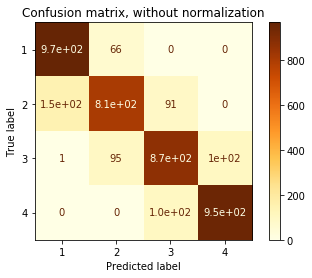

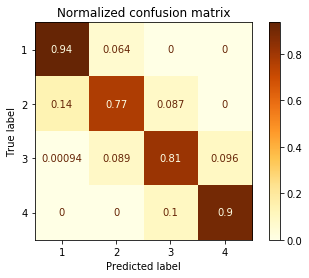

Confusion matrix, without normalization
[[896 136   0   0]
 [151 804  92   0]
 [  1 127 828 112]
 [  0   0 123 930]]
Normalized confusion matrix
[[0.86821705 0.13178295 0.         0.        ]
 [0.14422159 0.76790831 0.08787011 0.        ]
 [0.00093633 0.11891386 0.7752809  0.10486891]
 [0.         0.         0.11680912 0.88319088]]


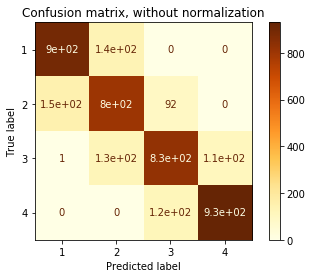

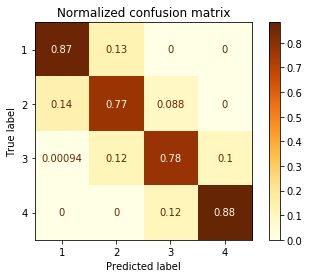

Classificaion Report: 
              precision    recall  f1-score   support

           1       0.87      0.94      0.90      1032
           2       0.83      0.77      0.80      1047
           3       0.82      0.81      0.82      1068
           4       0.90      0.90      0.90      1053

    accuracy                           0.85      4200
   macro avg       0.85      0.86      0.85      4200
weighted avg       0.85      0.85      0.85      4200

Classificaion Report(real): 
              precision    recall  f1-score   support

           1       0.85      0.87      0.86      1032
           2       0.75      0.77      0.76      1047
           3       0.79      0.78      0.78      1068
           4       0.89      0.88      0.89      1053

    accuracy                           0.82      4200
   macro avg       0.82      0.82      0.82      4200
weighted avg       0.82      0.82      0.82      4200



In [182]:
titles_options = [('Confusion matrix, without normalization', None),('Normalized confusion matrix', 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(Ada_all, X_test, y_test,
                                 display_labels=[1, 2, 3, 4],
                                 cmap=plt.cm.YlOrBr,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


titles_options = [('Confusion matrix, without normalization', None),
                  ('Normalized confusion matrix', 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(AdaReal_all, X_test, y_test,
                                 display_labels=[1, 2, 3, 4],
                                 cmap=plt.cm.YlOrBr,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


print('Classificaion Report: ')
print(classification_report(y_test, y_pred_Ada_all))
print('Classificaion Report(real): ')
print(classification_report(y_test, y_pred_AdaReal_all))

In [67]:
# Original
predictors = ['carat', 'cut', 'color', 'clarity']

Ada_ori = AdaBoostClassifier(base_estimator=dt_stump, learning_rate=LearnR,
                             n_estimators=200, random_state=RandState, algorithm='SAMME')
Ada_ori.fit(X_train[predictors], y_train)
print('Training accuracy: ', Ada_ori.score(X_train[predictors], y_train))
print('Testing accuracy: ', Ada_ori.score(X_test[predictors], y_test))


AdaReal_ori = AdaBoostClassifier(base_estimator=dt, learning_rate=LearnR,
                                  n_estimators=200, random_state=RandState, algorithm='SAMME.R')
AdaReal_ori.fit(X_train[predictors], y_train)
print('Training accuracy(real): ', AdaReal_ori.score(X_train[predictors], y_train))
print('Testing accuracy(real): ', AdaReal_ori.score(X_test[predictors], y_test))

y_pred_Ada_ori = Ada_ori.predict(X_test[predictors])
print('f1 score[micro]= ', f1_score(y_test, y_pred_Ada_ori, average='micro'))

y_pred_AdaReal_ori = AdaReal_ori.predict(X_test[predictors])
print('f1 score[micro]= ', f1_score(y_test, y_pred_AdaReal_ori, average='micro'))


print('Confusion Metrics:')
Ada_ori_CM = confusion_matrix(y_test, y_pred_Ada_ori)
pd.crosstab(y_test, y_pred_Ada_ori, rownames=['true'], colnames=['predicted'], margins=True)

Training accuracy:  0.5916386554621849
Testing accuracy:  0.5952380952380952
Training accuracy(real):  0.8878991596638656
Testing accuracy(real):  0.8245238095238095
f1 score[micro]=  0.5952380952380952
f1 score[micro]=  0.8245238095238097
Confusion Metrics:


predicted,1,2,3,4,All
true,,,,,
1,474,558,0,0,1032
2,47,878,111,11,1047
3,1,119,904,44,1068
4,0,0,809,244,1053
All,522,1555,1824,299,4200


In [68]:
print('Confusion Metrics:')
AdaReal_ori_CM = confusion_matrix(y_test, y_pred_AdaReal_ori)
pd.crosstab(y_test, y_pred_AdaReal_ori, rownames=['true'], colnames=['predicted'], margins=True)

Confusion Metrics:


predicted,1,2,3,4,All
true,,,,,
1,916,116,0,0,1032
2,154,792,101,0,1047
3,1,113,874,80,1068
4,0,0,172,881,1053
All,1071,1021,1147,961,4200


In [69]:
# Catergorized
predictors = ['carat_discrete', 'cut', 'color', 'clarity']

Ada_cat = AdaBoostClassifier(base_estimator=dt_stump, learning_rate=LearnR,
                             n_estimators=200, random_state=RandState, algorithm='SAMME')
Ada_cat.fit(X_train[predictors], y_train)
print('Training accuracy: ', Ada_cat.score(X_train[predictors], y_train))
print('Testing accuracy: ', Ada_cat.score(X_test[predictors], y_test))


AdaReal_cat = AdaBoostClassifier(base_estimator=dt, learning_rate=LearnR,
                                  n_estimators=200, random_state=RandState, algorithm='SAMME.R')
AdaReal_cat.fit(X_train[predictors], y_train)
print('Training accuracy(real): ', AdaReal_cat.score(X_train[predictors], y_train))
print('Testing accuracy(real): ', AdaReal_cat.score(X_test[predictors], y_test))

y_pred_Ada_cat = Ada_cat.predict(X_test[predictors])
print('f1 score[micro]= ', f1_score(y_test, y_pred_Ada_cat, average='micro'))

y_pred_AdaReal_cat = AdaReal_cat.predict(X_test[predictors])
print('f1 score[micro]= ', f1_score(y_test, y_pred_AdaReal_cat, average='micro'))


print('Confusion Metrics:')
Ada_cat_CM = confusion_matrix(y_test, y_pred_Ada_cat)
pd.crosstab(y_test, y_pred_Ada_cat, rownames=['true'], colnames=['predicted'], margins=True)

Training accuracy:  0.6433193277310925
Testing accuracy:  0.6385714285714286
Training accuracy(real):  0.613655462184874
Testing accuracy(real):  0.6097619047619047
f1 score[micro]=  0.6385714285714286
f1 score[micro]=  0.6097619047619047
Confusion Metrics:


predicted,1,2,3,4,All
true,,,,,
1,605,426,0,1,1032
2,52,813,144,38,1047
3,1,212,639,216,1068
4,0,14,414,625,1053
All,658,1465,1197,880,4200


In [70]:
print('Confusion Metrics:')
AdaReal_cat_CM = confusion_matrix(y_test, y_pred_AdaReal_cat)
pd.crosstab(y_test, y_pred_AdaReal_cat, rownames=['true'], colnames=['predicted'], margins=True)

Confusion Metrics:


predicted,1,2,3,4,All
true,,,,,
1,905,126,1,0,1032
2,325,466,185,71,1047
3,18,146,421,483,1068
4,0,1,283,769,1053
All,1248,739,890,1323,4200


In [71]:
# Continuous+Binarized
predictors = ['carat', 'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']

Ada_CB = AdaBoostClassifier(base_estimator=dt_stump, learning_rate=LearnR,
                            n_estimators=200, random_state=RandState, algorithm='SAMME')
Ada_CB.fit(X_train[predictors], y_train)
print('Training accuracy: ', Ada_CB.score(X_train[predictors], y_train))
print('Testing accuracy: ', Ada_CB.score(X_test[predictors], y_test))


AdaReal_CB = AdaBoostClassifier(base_estimator=dt, learning_rate=LearnR,
                                n_estimators=200, random_state=RandState, algorithm='SAMME.R')
AdaReal_CB.fit(X_train[predictors], y_train)
print('Training accuracy(real): ', AdaReal_CB.score(X_train[predictors], y_train))
print('Testing accuracy(real): ', AdaReal_CB.score(X_test[predictors], y_test))

y_pred_Ada_CB = Ada_CB.predict(X_test[predictors])
print('f1 score[micro]= ', f1_score(y_test, y_pred_Ada_CB, average='micro'))

y_pred_AdaReal_CB = AdaReal_CB.predict(X_test[predictors])
print('f1 score[micro]= ', f1_score(y_test, y_pred_AdaReal_CB, average='micro'))


print('Confusion Metrics:')
Ada_CB_CM = confusion_matrix(y_test, y_pred_Ada_CB)
pd.crosstab(y_test, y_pred_Ada_CB, rownames=['true'], colnames=['predicted'], margins=True)

Training accuracy:  0.6063445378151261
Testing accuracy:  0.5997619047619047
Training accuracy(real):  0.874453781512605
Testing accuracy(real):  0.805952380952381
f1 score[micro]=  0.5997619047619047
f1 score[micro]=  0.8059523809523811
Confusion Metrics:


predicted,1,2,3,4,All
true,,,,,
1,349,683,0,0,1032
2,63,818,157,9,1047
3,2,140,780,146,1068
4,0,1,480,572,1053
All,414,1642,1417,727,4200


In [72]:
print('Confusion Metrics:')
AdaReal_CB_CM = confusion_matrix(y_test, y_pred_AdaReal_CB)
pd.crosstab(y_test, y_pred_AdaReal_CB, rownames=['true'], colnames=['predicted'], margins=True)

Confusion Metrics:


predicted,1,2,3,4,All
true,,,,,
1,764,268,0,0,1032
2,97,859,91,0,1047
3,1,117,867,83,1068
4,0,0,158,895,1053
All,862,1244,1116,978,4200


In [74]:
# Discretized+Binarized
predictors = ['carat_discrete', 'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']

Ada_DB = AdaBoostClassifier(base_estimator=dt_stump, learning_rate=LearnR,
                            n_estimators=200, random_state=RandState, algorithm='SAMME')
Ada_DB.fit(X_train[predictors], y_train)
print('Training accuracy: ', Ada_DB.score(X_train[predictors], y_train))
print('Testing accuracy: ', Ada_DB.score(X_test[predictors], y_test))


AdaReal_DB = AdaBoostClassifier(base_estimator=dt, learning_rate=LearnR,
                                n_estimators=200, random_state=RandState, algorithm='SAMME.R')
AdaReal_DB.fit(X_train[predictors], y_train)
print('Training accuracy(real): ', AdaReal_DB.score(X_train[predictors], y_train))
print('Testing accuracy(real): ', AdaReal_DB.score(X_test[predictors], y_test))

y_pred_Ada_DB = Ada_DB.predict(X_test[predictors])
print('f1 score[micro]= ', f1_score(y_test, y_pred_Ada_DB, average='micro'))

y_pred_AdaReal_DB = AdaReal_DB.predict(X_test[predictors])
print('f1 score[micro]= ', f1_score(y_test, y_pred_AdaReal_DB, average='micro'))


print('Confusion Metrics:')
Ada_DB_CM = confusion_matrix(y_test, y_pred_Ada_DB)
pd.crosstab(y_test, y_pred_Ada_DB, rownames=['true'], colnames=['predicted'], margins=True)

Training accuracy:  0.6373949579831932
Testing accuracy:  0.6385714285714286
Training accuracy(real):  0.5915546218487395
Testing accuracy(real):  0.5847619047619048
f1 score[micro]=  0.6385714285714286
f1 score[micro]=  0.5847619047619048
Confusion Metrics:


predicted,1,2,3,4,All
true,,,,,
1,602,429,0,1,1032
2,91,795,127,34,1047
3,2,238,573,255,1068
4,0,9,332,712,1053
All,695,1471,1032,1002,4200


In [75]:
print('Confusion Metrics:')
AdaReal_DB_CM = confusion_matrix(y_test, y_pred_AdaReal_DB)
pd.crosstab(y_test, y_pred_AdaReal_DB, rownames=['true'], colnames=['predicted'], margins=True)

Confusion Metrics:


predicted,1,2,3,4,All
true,,,,,
1,690,338,4,0,1032
2,151,635,168,93,1047
3,14,204,346,504,1068
4,0,52,216,785,1053
All,855,1229,734,1382,4200


# RandomForest

In [162]:
from sklearn.ensemble import RandomForestClassifier

CN = 'entropy'
MaxDp = 100
Est = 400
MinSpt = 2
RandState = 7

In [163]:
# All Features
RF_all = RandomForestClassifier(criterion=CN, n_estimators=Est, max_depth=MaxDp, min_samples_split=MinSpt, random_state=RandState, oob_score=True)
RF_all.fit(X_train, y_train)

print('Training accuracy: ', RF_all.score(X_train, y_train))
print('Testing accuracy: ', RF_all.score(X_test, y_test))
print('Out-of-bag score: ', RF_all.oob_score_)

y_pred_RF_all = RF_all.predict(X_test)
print('f1 score[macro]= ', f1_score(y_test, y_pred_RF_all, average='macro'))

print('Confusion Metrics:')
RF_all_CM = confusion_matrix(y_test, y_pred_RF_all)
pd.crosstab(y_test, y_pred_RF_all, rownames=['true'], colnames=['predicted'], margins=True)

Training accuracy:  0.9223529411764706
Testing accuracy:  0.8585714285714285
Out-of-bag score:  0.858109243697479
f1 score[macro]=  0.8577684881664498
Confusion Metrics:


predicted,1,2,3,4,All
true,,,,,
1,960,72,0,0,1032
2,144,806,97,0,1047
3,1,83,876,108,1068
4,0,0,89,964,1053
All,1105,961,1062,1072,4200


In [171]:
# Original
predictors = ['carat', 'cut', 'color', 'clarity']

RF_ori = RandomForestClassifier(criterion=CN, n_estimators=Est, max_depth=MaxDp, min_samples_split=MinSpt, random_state=RandState, oob_score=True)
RF_ori.fit(X_train[predictors], y_train)

print('Training accuracy: ', RF_ori.score(X_train[predictors], y_train))
print('Testing accuracy: ', RF_ori.score(X_test[predictors], y_test))
print('Out-of-bag score: ', RF_ori.oob_score_)

y_pred_RF_ori = RF_ori.predict(X_test[predictors])
print('f1 score[macro]= ', f1_score(y_test, y_pred_RF_ori, average='macro'))

print('Confusion Metrics:')
RF_ori_CM = confusion_matrix(y_test, y_pred_RF_ori)
pd.crosstab(y_test, y_pred_RF_ori, rownames=['true'], colnames=['predicted'], margins=True)

Training accuracy:  0.9223529411764706
Testing accuracy:  0.8621428571428571
Out-of-bag score:  0.8618487394957983
f1 score[macro]=  0.8612146722414548
Confusion Metrics:


predicted,1,2,3,4,All
true,,,,,
1,962,70,0,0,1032
2,142,807,98,0,1047
3,1,81,878,108,1068
4,0,0,79,974,1053
All,1105,958,1055,1082,4200


In [165]:
# Categorized
predictors = ['carat_discrete', 'cut', 'color', 'clarity']

RF_cat = RandomForestClassifier(criterion=CN, n_estimators=Est, max_depth=MaxDp, min_samples_split=MinSpt, random_state=RandState, oob_score=True)
RF_cat.fit(X_train[predictors], y_train)

print('Training accuracy: ', RF_cat.score(X_train[predictors], y_train))
print('Testing accuracy: ', RF_cat.score(X_test[predictors], y_test))
print('Out-of-bag score: ', RF_cat.oob_score_)

y_pred_RF_cat = RF_cat.predict(X_test[predictors])
print('f1 score[macro]= ', f1_score(y_test, y_pred_RF_cat, average='macro'))

print('Confusion Metrics:')
RF_cat_CM = confusion_matrix(y_test, y_pred_RF_cat)
pd.crosstab(y_test, y_pred_RF_cat, rownames=['true'], colnames=['predicted'], margins=True)

Training accuracy:  0.7384033613445378
Testing accuracy:  0.7285714285714285
Out-of-bag score:  0.7222689075630252
f1 score[macro]=  0.7295377104728766
Confusion Metrics:


predicted,1,2,3,4,All
true,,,,,
1,929,103,0,0,1032
2,165,739,131,12,1047
3,4,189,685,190,1068
4,0,7,339,707,1053
All,1098,1038,1155,909,4200


In [166]:
# Continuous+Binarized
predictors = ['carat', 'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']

RF_CB = RandomForestClassifier(criterion=CN, n_estimators=Est, max_depth=MaxDp, min_samples_split=MinSpt, random_state=RandState, oob_score=True)
RF_CB.fit(X_train[predictors], y_train)

print('Training accuracy: ', RF_CB.score(X_train[predictors], y_train))
print('Testing accuracy: ', RF_CB.score(X_test[predictors], y_test))
print('Out-of-bag score: ', RF_CB.oob_score_)

y_pred_RF_CB = RF_CB.predict(X_test[predictors])
print('f1 score[macro]= ', f1_score(y_test, y_pred_RF_CB, average='macro'))

print('Confusion Metrics:')
RF_CB_CM = confusion_matrix(y_test, y_pred_RF_CB)
pd.crosstab(y_test, y_pred_RF_CB, rownames=['true'], colnames=['predicted'], margins=True)

Training accuracy:  0.9223529411764706
Testing accuracy:  0.8576190476190476
Out-of-bag score:  0.8576050420168068
f1 score[macro]=  0.8567940568279389
Confusion Metrics:


predicted,1,2,3,4,All
true,,,,,
1,960,72,0,0,1032
2,144,804,99,0,1047
3,1,84,874,109,1068
4,0,0,89,964,1053
All,1105,960,1062,1073,4200


In [167]:
# Discretized+Binarized
predictors = ['carat_discrete', 'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']

RF_DB = RandomForestClassifier(criterion=CN, n_estimators=Est, max_depth=MaxDp, min_samples_split=MinSpt, random_state=RandState, oob_score=True)
RF_DB.fit(X_train[predictors], y_train)

print('Training accuracy: ', RF_DB.score(X_train[predictors], y_train))
print('Testing accuracy: ', RF_DB.score(X_test[predictors], y_test))
print('Out-of-bag score: ', RF_DB.oob_score_)

y_pred_RF_DB = RF_DB.predict(X_test[predictors])
print('f1 score[macro]= ', f1_score(y_test, y_pred_RF_DB, average='macro'))

print('Confusion Metrics:')
RF_DB_CM = confusion_matrix(y_test, y_pred_RF_DB)
pd.crosstab(y_test, y_pred_RF_DB, rownames=['true'], colnames=['predicted'], margins=True)

Training accuracy:  0.7384033613445378
Testing accuracy:  0.7283333333333334
Out-of-bag score:  0.7219747899159664
f1 score[macro]=  0.7292632472112501
Confusion Metrics:


predicted,1,2,3,4,All
true,,,,,
1,929,103,0,0,1032
2,165,741,129,12,1047
3,4,192,682,190,1068
4,0,7,339,707,1053
All,1098,1043,1150,909,4200


Confusion matrix, without normalization
[[962  70   0   0]
 [142 807  98   0]
 [  1  81 878 108]
 [  0   0  79 974]]
Normalized confusion matrix
[[0.93217054 0.06782946 0.         0.        ]
 [0.1356256  0.77077364 0.09360076 0.        ]
 [0.00093633 0.0758427  0.82209738 0.1011236 ]
 [0.         0.         0.07502374 0.92497626]]


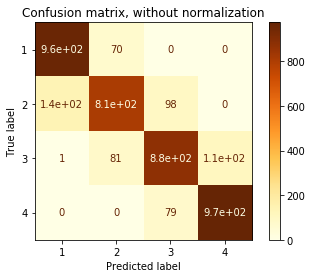

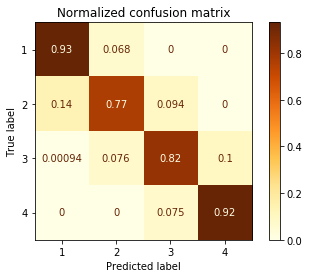

In [172]:
titles_options = [('Confusion matrix, without normalization', None),
                  ('Normalized confusion matrix', 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(RF_ori, X_test[predictors], y_test,
                                 display_labels=[1, 2, 3, 4],
                                 cmap=plt.cm.YlOrBr,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [183]:
print('Classificaion Report: ')
print(classification_report(y_test, y_pred_RF_ori))

Classificaion Report: 
              precision    recall  f1-score   support

           1       0.87      0.93      0.90      1032
           2       0.84      0.77      0.80      1047
           3       0.83      0.82      0.83      1068
           4       0.90      0.92      0.91      1053

    accuracy                           0.86      4200
   macro avg       0.86      0.86      0.86      4200
weighted avg       0.86      0.86      0.86      4200

